In [3]:
import os
import pyconll
import string
import unicodedata
import matplotlib.pyplot as plt
from collections import defaultdict
from collections import Counter
from nltk.corpus import stopwords

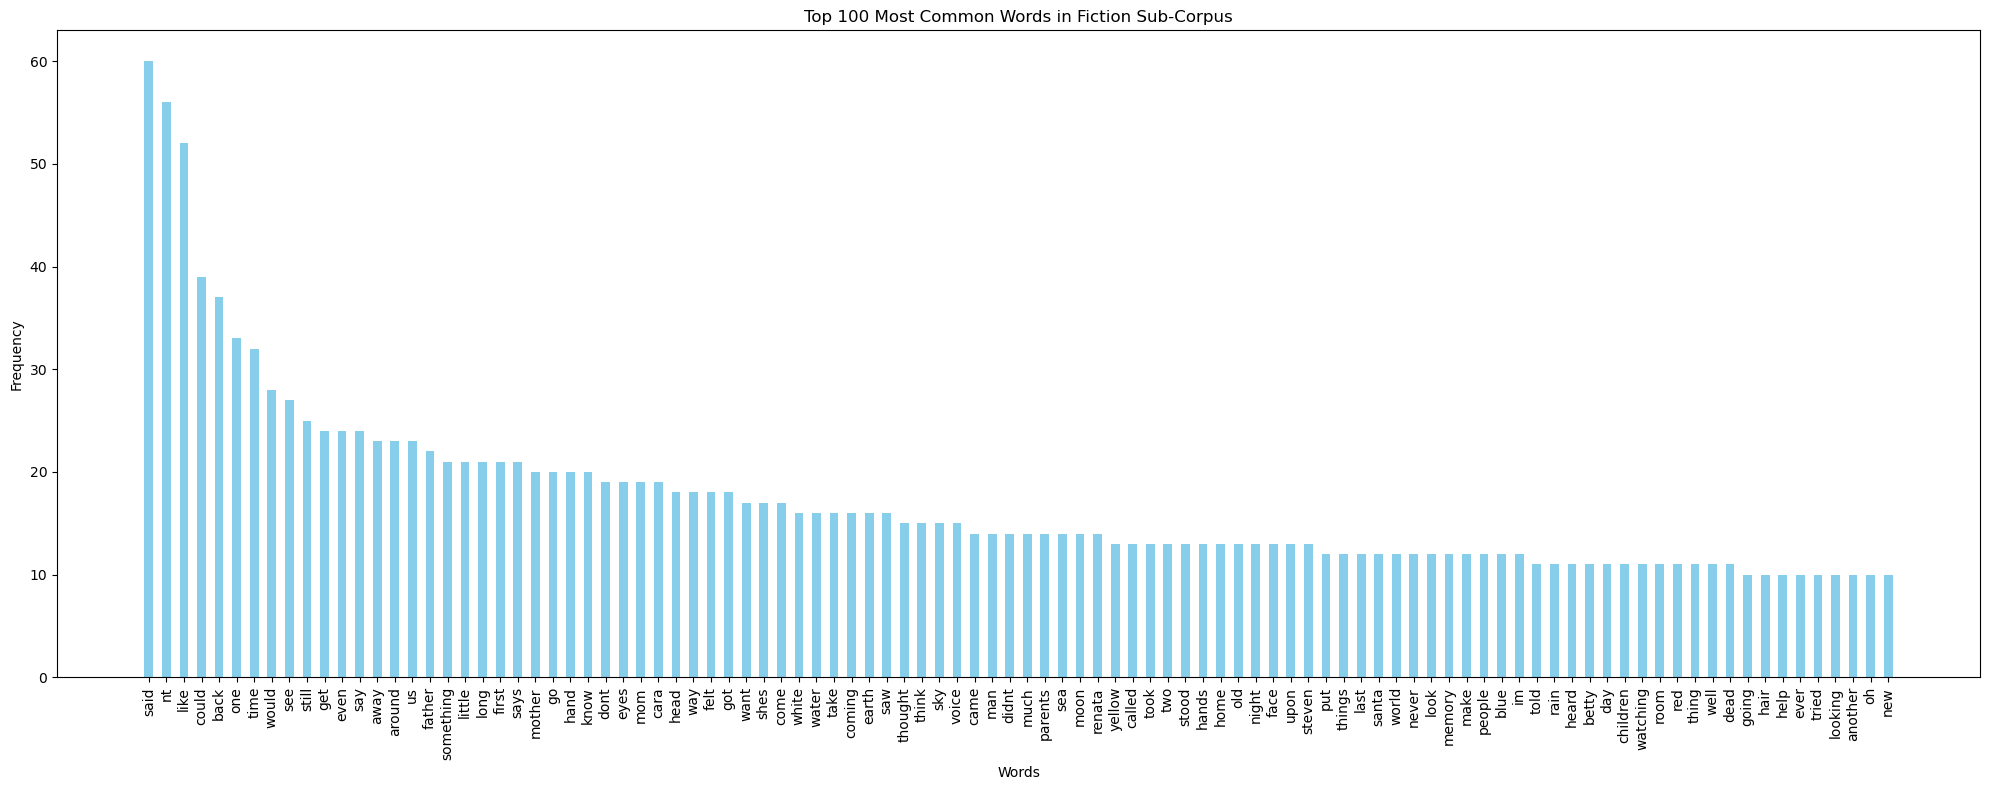

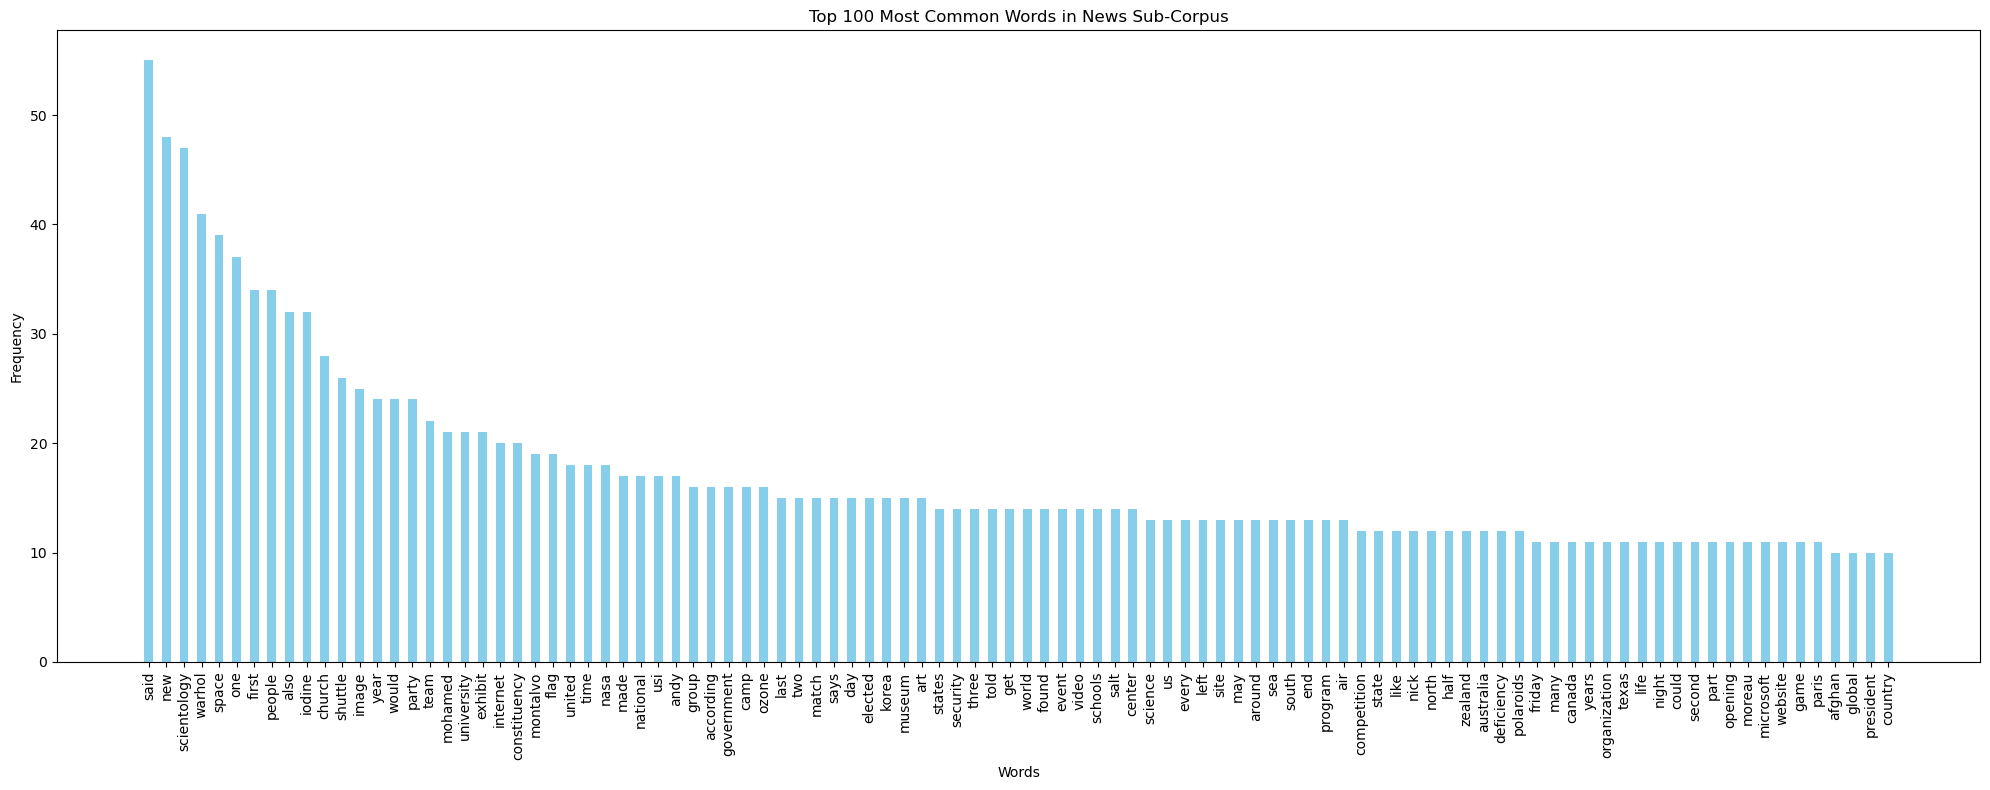

In [7]:
# Trying to create a function that lets us preprocess the data, exclude punctuation marks and stopwords
stop_words = set(stopwords.words('english'))

def preprocessing_machine(folder_path):
    word_counts = Counter()
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.conllu'):
            file_path = os.path.join(folder_path, file_name)
            try:
                corpus = pyconll.load_from_file(file_path)
                for sentence in corpus:
                    for token in sentence:
                        # Incomplete words and apostrophes kept showing up on the plot and this part is my solution
                        word = unicodedata.normalize('NFKD', token.form).encode('ASCII', 'ignore').decode('utf-8').lower()                        
                        if word.isalpha() and word not in stop_words:
                            word_counts[word] += 1
            except Exception as e:
                print(f"Error loading {file_path}: {e}")
    return word_counts


# Loading the data

fiction_path = "C:\\Users\\Yigi\\Desktop\\Python Project\\data\\fiction"
news_path = "C:\\Users\\Yigi\\Desktop\\Python Project\\data\\news"

fiction_counts = preprocessing_machine(fiction_path)
news_counts = preprocessing_machine(news_path)


# Creating a function to plot the 100 most common words for each sub-corpus
def plot_top_words(common_words, title):
    words, frequencies = zip(*common_words) 

    plt.figure(figsize=(20, 8))  # Can adjust size here for better readability
    plt.bar(words, frequencies, width=0.5, color='skyblue')  
# Formatting the plot
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(rotation='vertical')
    plt.tight_layout()
    plt.show()

# Get the 100 most common words in each sub-corpus and plot
fiction_top_100 = fiction_counts.most_common(100)
news_top_100 = news_counts.most_common(100)

plot_top_words(fiction_top_100, 'Top 100 Most Common Words in Fiction Sub-Corpus')

plot_top_words(news_top_100, 'Top 100 Most Common Words in News Sub-Corpus')



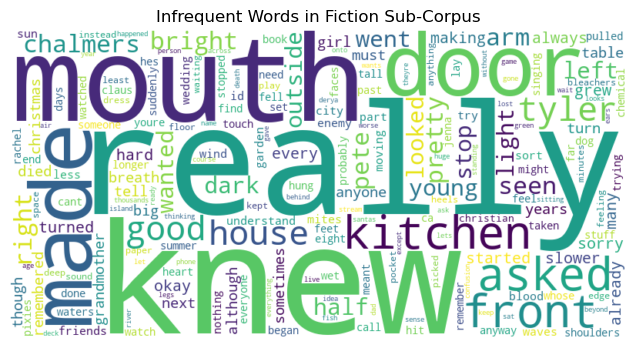

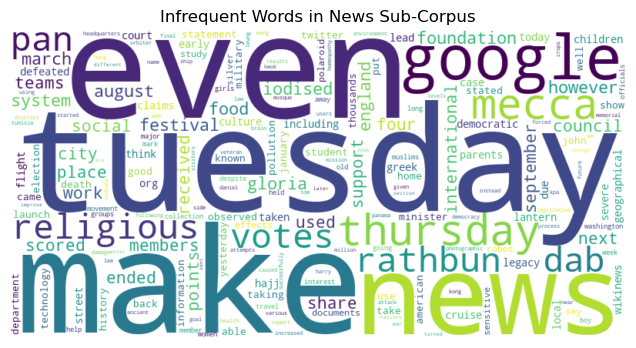

In [20]:
# Creating a function to filter words that appear less than 10 times. 

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def less_than_10_detector(word_counts):
    return {word: count for word, count in word_counts.items() if count < 10}

# Function to create a word cloud from word frequencies
def wordcloud_factory(word_frequencies, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

    
fiction_path = "C:\\Users\\Yigi\\Desktop\\Python Project\\data\\fiction"
news_path = "C:\\Users\\Yigi\\Desktop\\Python Project\\data\\news" 

# Filtering the word counts for both sub-corpora
fiction_infrequent = less_than_10_detector(fiction_counts)
news_infrequent = less_than_10_detector(news_counts)

# Creating and displaying the word clouds for both sub-corpora
wordcloud_factory(fiction_infrequent, 'Infrequent Words in Fiction Sub-Corpus')
wordcloud_factory(news_infrequent, 'Infrequent Words in News Sub-Corpus')


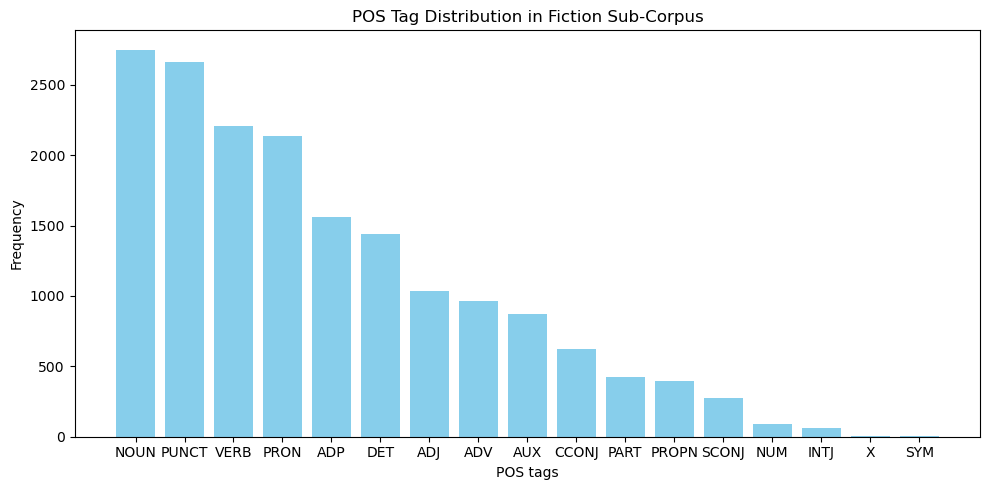

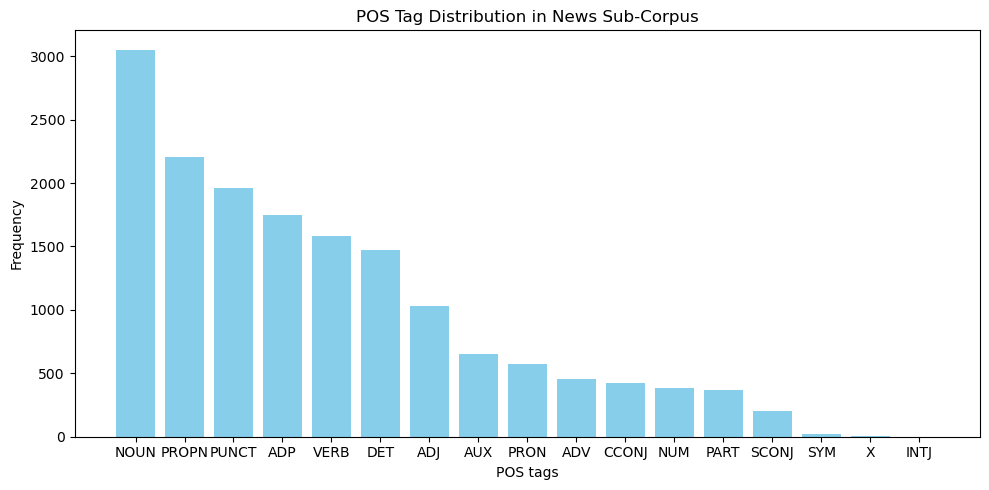

In [18]:
# Creating a function to count the POS tags
fiction_path = "C:\\Users\\Yigi\\Desktop\\Python Project\\data\\fiction"
news_path = "C:\\Users\\Yigi\\Desktop\\Python Project\\data\\news"

def count_pos_tags(corpus_path):
    pos_counts = Counter()
    for file_name in os.listdir(corpus_path):
        if file_name.endswith('.conllu'):
            file_path = os.path.join(corpus_path, file_name)
            try:
                corpus = pyconll.load_from_file(file_path)
                for sentence in corpus:
                    for token in sentence:
                        if '-' not in token.id and '.' not in token.id:  # This filters out multiword tokens and empty nodes
                            pos_counts[token.upos] += 1
            except Exception as e:
                print(f"Error loading {file_path}: {e}")
    return pos_counts

# Creating a function to plot the distribution of the POS tags

def plot_pos_distribution(pos_counts, title):
    # Sorting the POS tags by frequency
    pos_tags, frequencies = zip(*pos_counts.most_common())
    
    plt.figure(figsize=(10, 5)) # Can adjust size
    plt.bar(pos_tags, frequencies, color='skyblue')
    
    plt.xlabel('POS tags')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(rotation='horizontal')
    plt.tight_layout()
    plt.show()

# Counting the POS tags for both sub-corpora
fiction_pos_counts = count_pos_tags(fiction_path)
news_pos_counts = count_pos_tags(news_path)

# Plotting the POS tag distribution for both sub-corpora
plot_pos_distribution(fiction_pos_counts, 'POS Tag Distribution in Fiction Sub-Corpus')
plot_pos_distribution(news_pos_counts, 'POS Tag Distribution in News Sub-Corpus')

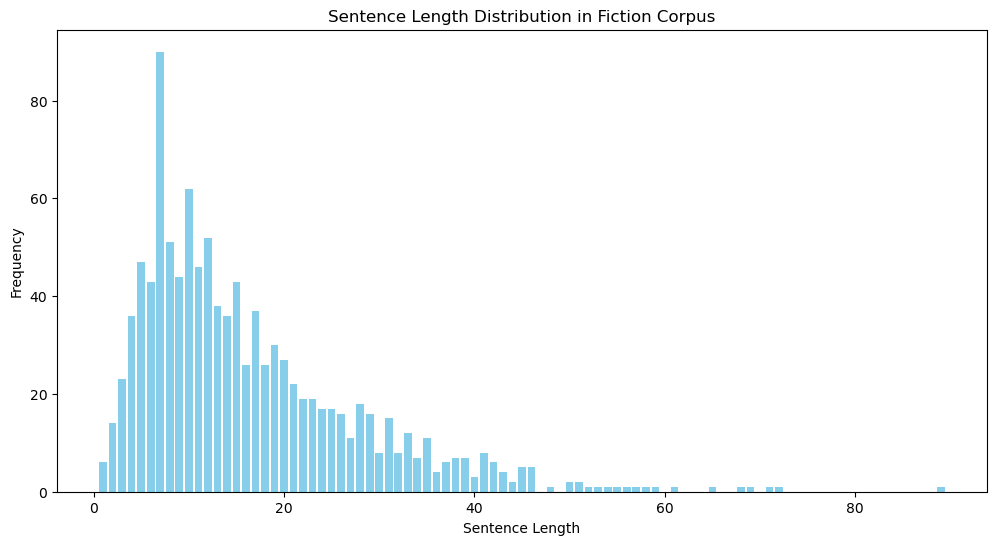

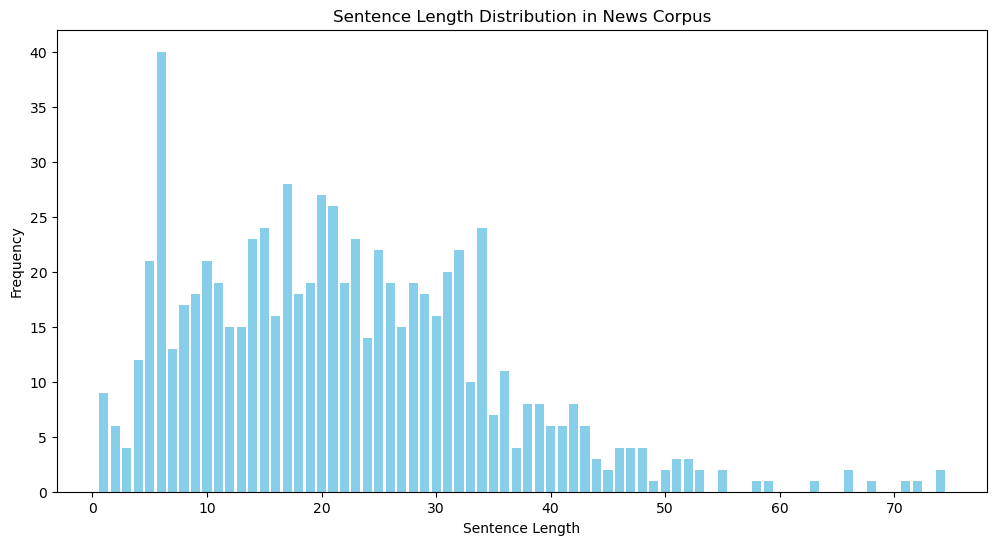

In [5]:
# Creating a function to measure sentence length

def load_and_count_sentence_lengths(folder_path):
    sentence_lengths = Counter()

    # Loop over every file in the directory
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.conllu'):
            file_path = os.path.join(folder_path, file_name)
            try:
                corpus = pyconll.load_from_file(file_path)
                for sentence in corpus:
                    # Count the tokens in the sentence, exclude multiword tokens
                    num_tokens = len([token for token in sentence if '-' not in token.id])
                    # Increment the count for this sentence length
                    sentence_lengths[num_tokens] += 1
            except Exception as e:
                print(f"Error loading {file_path}: {e}")
    
    return sentence_lengths

def plot_sentence_length_distribution(sentence_lengths, title):
    
    # Sort sentence lengths for plotting
    lengths, frequencies = zip(*sorted(sentence_lengths.items()))

    plt.figure(figsize=(12, 6)) # Adjust size
    plt.bar(lengths, frequencies, color='skyblue')

    # Labeling the plot
    plt.xlabel('Sentence Length')
    plt.ylabel('Frequency')
    plt.title(title)
    
    # Showing the plot
    plt.show()

fiction_path = "C:\\Users\\Yigi\\Desktop\\Python Project\\data\\fiction"
news_path = "C:\\Users\\Yigi\\Desktop\\Python Project\\data\\news"

# Count sentence lengths for each corpus
fiction_sentence_lengths = load_and_count_sentence_lengths(fiction_path)
news_sentence_lengths = load_and_count_sentence_lengths(news_path)

# Plot the distribution of sentence lengths
plot_sentence_length_distribution(fiction_sentence_lengths, 'Sentence Length Distribution in Fiction Corpus')
plot_sentence_length_distribution(news_sentence_lengths, 'Sentence Length Distribution in News Corpus')


In [7]:
# Creating a function to figure out the distribution of Pronouns vs other NPs

fiction_path = "C:\\Users\\Yigi\\Desktop\\Python Project\\data\\fiction"
news_path = "C:\\Users\\Yigi\\Desktop\\Python Project\\data\\news"

def count_pos_tags(folder_path):
   
    pos_counts = {'PRON': 0, 'NOUN': 0}  # Initialize counts for pronouns and nouns

    # Keep going over all CoNLL-U files in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.conllu'):
            file_path = os.path.join(folder_path, file_name)
            try:
                corpus = pyconll.load_from_file(file_path)
                for sentence in corpus:
                    for token in sentence:
                        if token.upos in pos_counts:
                            pos_counts[token.upos] += 1
            except Exception as e:
                print(f"Error loading {file_path}: {e}")
    
    return pos_counts

# Count POS tags in each sub-corpus
fiction_pos_counts = count_pos_tags(fiction_path)
news_pos_counts = count_pos_tags(news_path)

print("Fiction Corpus POS Counts:", fiction_pos_counts)
print("News Corpus POS Counts:", news_pos_counts)


Fiction Corpus POS Counts: {'PRON': 2133, 'NOUN': 2749}
News Corpus POS Counts: {'PRON': 572, 'NOUN': 3051}


In [4]:
# Creating a function to make a basic statistical table

def calculate_statistics(folder_path):
    sentence_lengths = []  # Store the length of each sentence
    
    # Go over all CoNLL-U files in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.conllu'):
            file_path = os.path.join(folder_path, file_name)
            try:
                corpus = pyconll.load_from_file(file_path)
                for sentence in corpus:
                    # Count tokens in each sentence, exclude multiword tokens
                    sentence_length = len([token for token in sentence if '-' not in token.id])
                    sentence_lengths.append(sentence_length)
            except Exception as e:
                print(f"Error loading {file_path}: {e}")

    # Calculate statistics
    total_sentences = len(sentence_lengths)
    max_length = max(sentence_lengths)
    min_length = min(sentence_lengths)
    mean_length = sum(sentence_lengths) / total_sentences if total_sentences > 0 else 0
    
    return total_sentences, max_length, min_length, mean_length

fiction_path = "C:\\Users\\Yigi\\Desktop\\Python Project\\data\\fiction"
news_path = "C:\\Users\\Yigi\\Desktop\\Python Project\\data\\news"

# Calculating the statistics for each sub-corpus
fiction_stats = calculate_statistics(fiction_path)
news_stats = calculate_statistics(news_path)

# Displaying the results
print(f"{'Corpus':<10} | {'Size':<5} | {'Max Len':<8} | {'Min Len':<8} | {'Mean Len':<8}")
print(f"{'-'*50}")
print(f"{'Fiction':<10} | {fiction_stats[0]:<5} | {fiction_stats[1]:<8} | {fiction_stats[2]:<8} | {fiction_stats[3]:<8.2f}")
print(f"{'News':<10} | {news_stats[0]:<5} | {news_stats[1]:<8} | {news_stats[2]:<8} | {news_stats[3]:<8.2f}")

Corpus     | Size  | Max Len  | Min Len  | Mean Len
--------------------------------------------------
Fiction    | 1070  | 89       | 1        | 16.36   
News       | 736   | 74       | 1        | 21.94   
